In [1]:
%cd ../..

/home/matheus/Desktop/Itens/Projetos/crawlers/jornais-universidades-crawler


/home/matheus/Desktop/Itens/Projetos/crawlers/jornais-universidades-crawler/crawler/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Colunas disponíveis no dataset: Index(['News URL', 'Title', 'Authors', 'Publication Date', 'Updated Date',
       'News Category', 'Tags', 'Description', 'Text', 'Related Links',
       'Images', 'Additional Content', 'Extraction Date'],
      dtype='object')


/tmp/ipykernel_32173/2287550454.py:13: UserWarning: Parsing dates in %d/%m/%Y, %Hh%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Publication Date'] = pd.to_datetime(data['Publication Date'], errors='coerce')


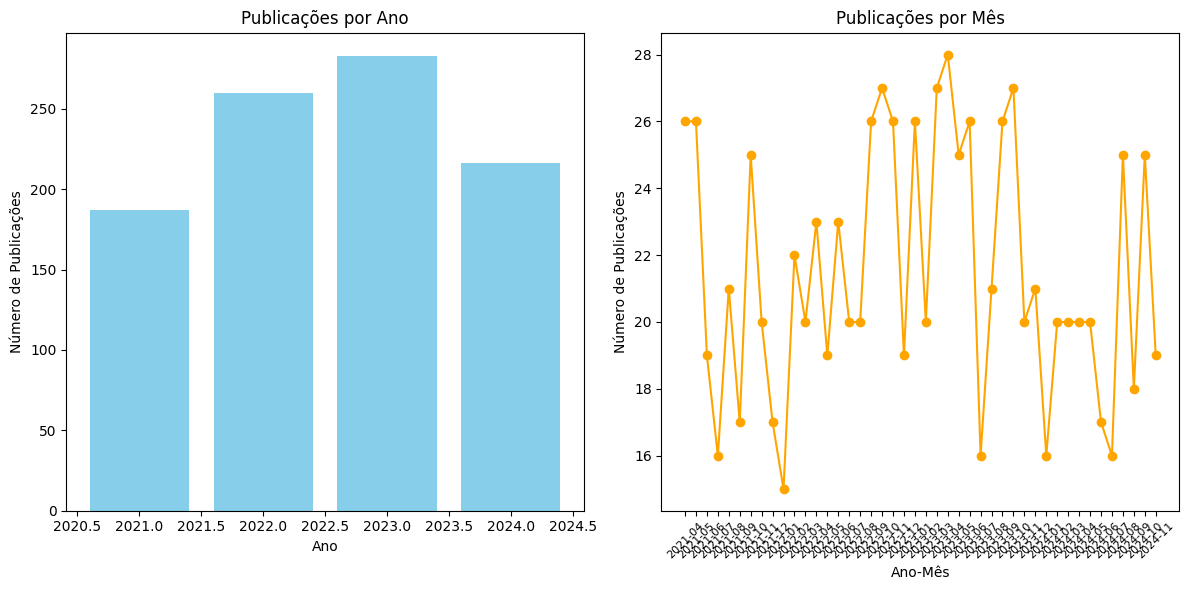

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar o dataset
file_path = 'data/UNESP/data.json'  # Substitua pelo caminho do seu arquivo JSON
data = pd.read_json(file_path)

# 2. Verificar as colunas disponíveis
print("Colunas disponíveis no dataset:", data.columns)

# 3. Converter a coluna 'Publication Date' para datetime
if 'Publication Date' in data.columns:
    data['Publication Date'] = pd.to_datetime(data['Publication Date'], errors='coerce')
else:
    raise ValueError("A coluna 'Publication Date' não está presente no dataset.")

# 4. Remover valores nulos ou inválidos na coluna de datas
data = data.dropna(subset=['Publication Date'])

# 5. Criar colunas auxiliares para análise temporal
data['Year'] = data['Publication Date'].dt.year
data['Month'] = data['Publication Date'].dt.month
data['Day'] = data['Publication Date'].dt.day

data['Year-Month'] = data['Publication Date'].dt.to_period('M')

# 6. Análise Temporal
# a. Contagem de publicações por ano
publications_per_year = data['Year'].value_counts().sort_index()

# b. Contagem de publicações por mês (agregado por ano)
publications_per_month = data['Year-Month'].value_counts().sort_index()

# 7. Plotar os resultados
plt.figure(figsize=(12, 6))

# Gráfico 1: Publicações por ano
plt.subplot(1, 2, 1)
plt.bar(publications_per_year.index, publications_per_year.values, color='skyblue')
plt.title('Publicações por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')

# Gráfico 2: Publicações por mês
plt.subplot(1, 2, 2)
plt.plot(publications_per_month.index.astype(str), publications_per_month.values, marker='o', color='orange')
plt.title('Publicações por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Publicações')
plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()
